In [1]:
import os
import numpy as np
from PIL import Image


## Step 1: Data Preparation


In [2]:

def load_yale_faces(dataset_path):
    images = []
    persons = []
    expressions = []
    for subject in os.listdir(dataset_path):
        image_path = os.path.join(dataset_path, subject)
        if os.path.isfile(image_path):
            image = Image.open(image_path).convert('L')  # Convert to grayscale
            images.append(np.array(image))
            expressions.append(subject.split('.', 1)[1])
            persons.append(int(subject.split('.', 1)[0][-2:]))
    return np.array(images), np.array(persons), np.array(expressions)

dataset_path = './data'
images, persons , expressions  = load_yale_faces(dataset_path)

In [3]:
from sklearn.preprocessing import StandardScaler

def preprocess_images(images, target_size=(100, 100)):
    resized_images = [Image.fromarray(img).resize(target_size) for img in images]
    flattened_images = [np.array(img).flatten() for img in resized_images]
    scaler = StandardScaler()
    normalized_images = scaler.fit_transform(flattened_images)
    return np.array(normalized_images)

preprocessed_images = preprocess_images(images , (200,200))

## Step 2: HOSVD Decomposition


In [4]:
from scipy.linalg import svd

def hosvd(tensor):
    unfoldings = [tensor.reshape(tensor.shape[i], -1) for i in range(tensor.ndim)]
    factors = [svd(unfolding, full_matrices=False)[0] for unfolding in unfoldings]
    core_tensor = tensor.copy()
    for mode, factor in enumerate(factors):
        core_tensor = np.tensordot(core_tensor, factor.T, axes=(0, 0))
    return core_tensor, factors

tensor = preprocessed_images.reshape(len(images), 200, 200)
core_tensor ,factors  = hosvd(tensor)

## Step 3: Face Recognition


In [5]:
def recognize_face(z, S, H):
    min_error = float('inf')
    best_e = None
    best_alpha = None
    
    for e in range(S.shape[0]):
        Se = S[e, :, :]
        alpha_e = np.linalg.lstsq(Se, z, rcond=None)[0]
        error = np.linalg.norm(Se @ alpha_e - z)
        
        if error < min_error:
            min_error = error
            best_e = e
            best_alpha = alpha_e
    
    return best_e, best_alpha

In [6]:
index_real = 20

In [7]:
new_image = preprocessed_images[index_real].reshape(200,200)

Real:
person:  2


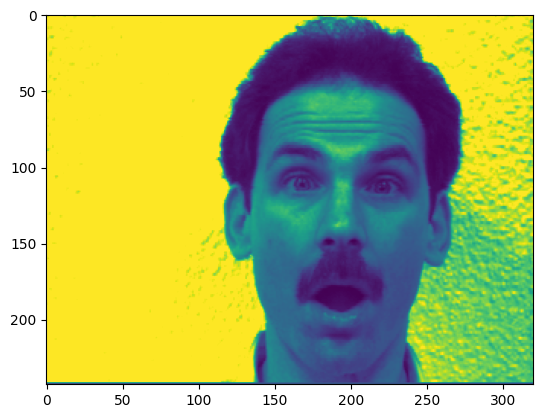

In [8]:
import matplotlib.pyplot as plt
print("Real:")
print("person: ", persons[index_real])
plt.imshow(images[index_real])


In [9]:
recognized_index = recognize_face(new_image, core_tensor, factors[2])[0]
recognized_index

138

In [10]:
recognized_label = persons[recognized_index]
print(f'Recognized as: {recognized_label}')

Recognized as: 13


predicted:
person:  2


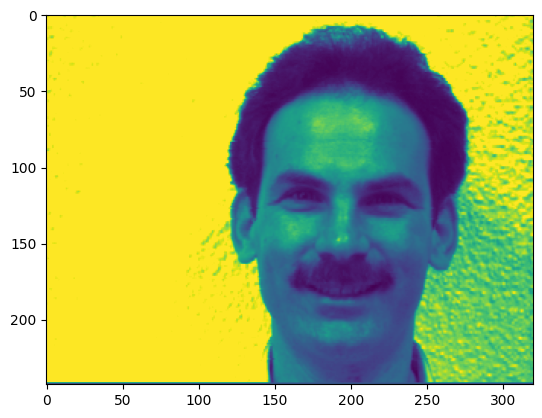

In [11]:
import matplotlib.pyplot as plt
print("predicted:")
print("person: ", persons[recognized_label])

plt.imshow(images[recognized_label])

## Step 4: Performance Evaluation


In [15]:
y_true = []  # True labels
y_pred = []  # Predicted labels

for i,image_org in enumerate(preprocessed_images):
    image = image_org.reshape(200,200)
    y_true.append(persons[i])
    recognized_index = recognize_face(new_image, core_tensor, factors[2])[0]
    y_pred.append(persons[recognized_index])


In [16]:
y_pred , y_true

([13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13],
 [1,
  1,

In [17]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)


Accuracy: 0.07
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        11
          13       0.07      1.00      0.12        11
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00        11

    accuracy                           0.07       165
   macro avg       0.00      0.07      0.01       165
weighted av

c:\Users\MohammadAli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MohammadAli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MohammadAli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa